In [1]:
#import packages 
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**Data Description**

For this project, the data provided is used to predict the usage of the Minecraft Server. Based on the players csv file, this data set contains the variables needed for the Minecraft server participants. 

|Variable Name |Data Type|Description|
|--------------|---------|------------|
|experience    |chr      |rated Minecraft level of each player|
|subscribe     |lgl      |if players are subscribed to the newsletter|
|hashedEmail  |chr      |coded email address that is specific to each player|
|played_hours  |dbl      |the number of hours each player has played|
|name          |chr      |name of each Minecraft player|
|gender        |chr      |gender of each Minecraft player|
|Age           |dbl      |age of each Minecraft player|

This dataset comprises a total of 7 variables and 196 players. Age and played_hours are quantitative variables, while gender and experience are categorical variables. Subscribe is a logical variable, and name and hashed_email are the identifiers used to identify the players. 
</p>

**Questions**

For the broad question, I have chosen which player characteristics and behaviours are most predictive of subscribing to a game 
related newsletter, and how do these factors differ between various player types. The specific question that I have formulated 
based on the broad question is that 'Can a players's age, gender, experience level, and total hours played predict whether they have subscribed to  the game related newsletter?' The data answers in the players.csv contain all the variables needed to answer both the broad and specific questions. 


**Exploratory Data Analysis and Visualization**

In [2]:
#read in and wrangle data
players_summary <- read_csv("data/players.csv", show_col_types = FALSE) |>
    mutate(experience = factor(experience),
          gender = factor(gender),
          subscribe = factor(subscribe))
players_summary

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [3]:
#summarize data
players_numeric_summary <- players_summary |>
    summarize(min_Age = min(Age, na.rm = TRUE), max_Age = max(Age, na.rm = TRUE), mean_Age = mean(Age, na.rm = TRUE),
              min_played_hours = min(played_hours, na.rm = TRUE), max_played_hours = max(played_hours, na.rm = TRUE), mean_played_hours = mean(played_hours, na.rm = TRUE))
players_numeric_summary

min_Age,max_Age,mean_Age,min_played_hours,max_played_hours,mean_played_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,58,21.13918,0,223.1,5.845918


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


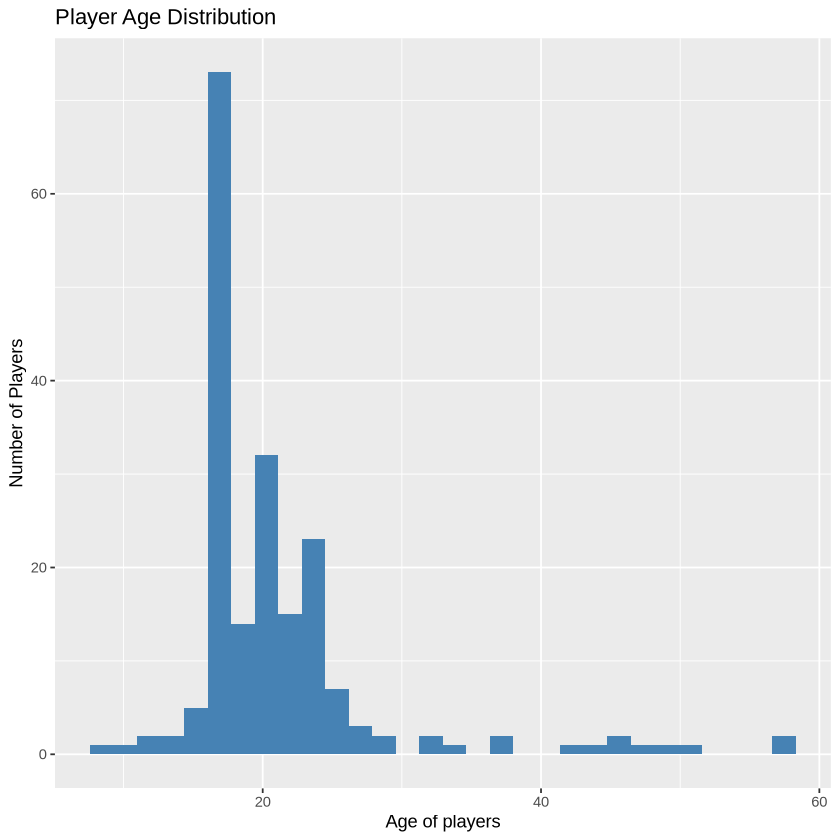

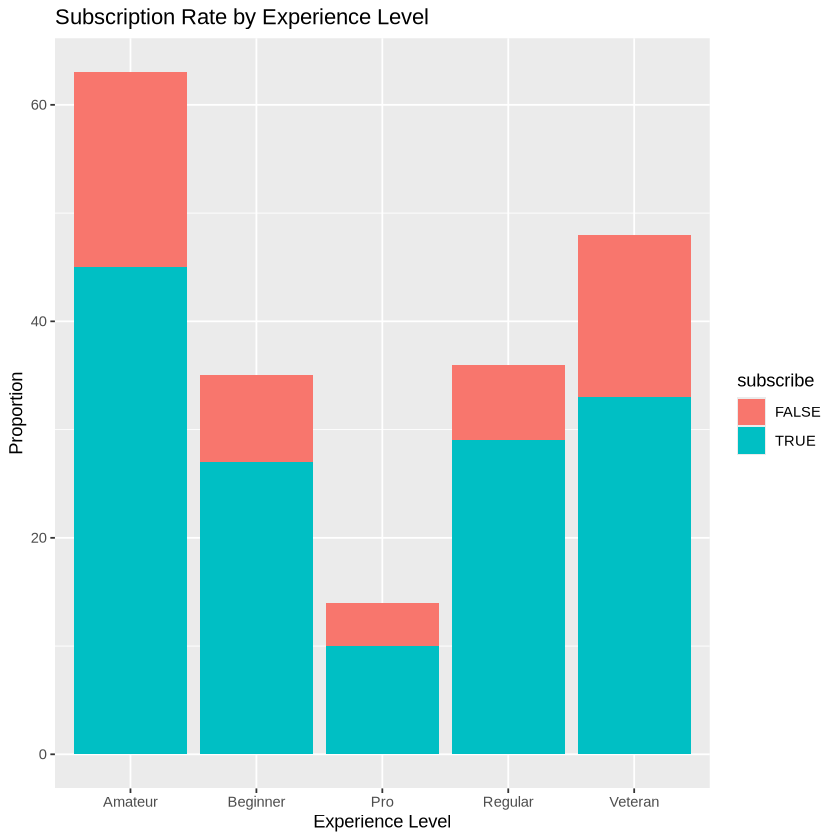

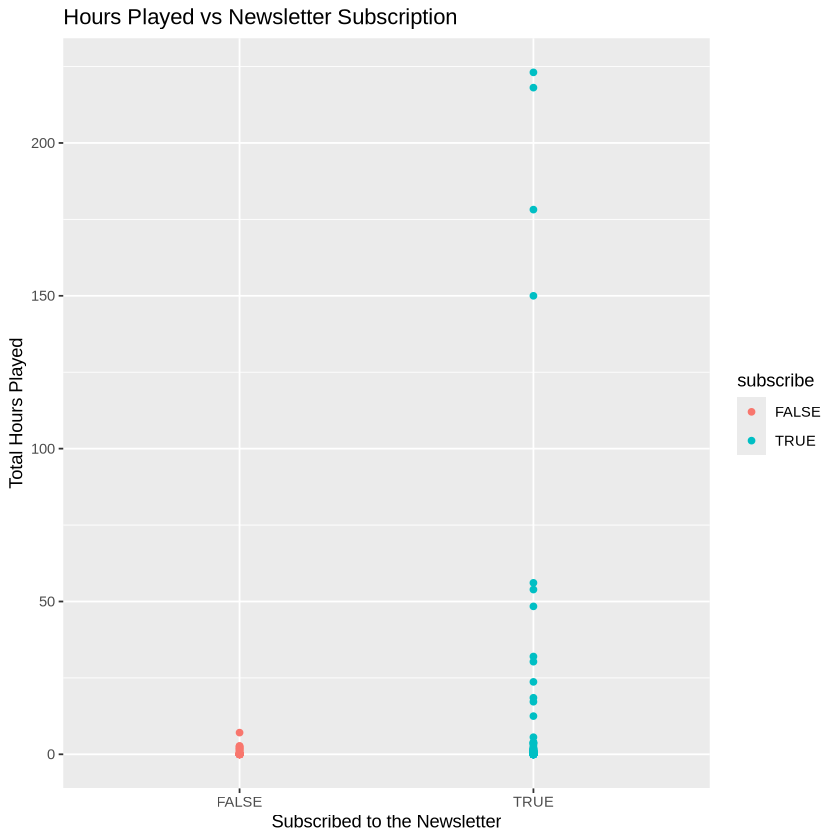

In [19]:
#make exploratory visualizations

#histogram of age 
age_plot <- ggplot(players_summary, aes(x = Age)) + 
    geom_histogram(fill = "steelblue") + 
    labs(title = "Player Age Distribution", x = "Age of players", y = "Number of Players")
age_plot

#bar plot of experience by subsciption
experience_plot <- ggplot(players_summary, aes(x = experience, fill = subscribe)) +
    geom_bar() +
    labs(title = "Subscription Rate by Experience Level", x = "Experience Level", y = "Proportion")
experience_plot



hours_plot <- ggplot(players_summary, aes(x = subscribe, y = played_hours, color = subscribe)) +
    geom_point() +
    labs(title = "Hours Played vs Newsletter Subscription",
       x = "Subscribed to the Newsletter", y = "Total Hours Played")
hours_plot




**Methods and Plans**

The method that can be used is linear regression because it can provide predictions of the subscription based on the player's age, gender, experience level, and the hours played based on the question that I have formulated. One assumption that can be made is that the relationship of the data is linear. To process the data, I can split the data into a testing and training set by setting the training set to 70% and the testing set to 30%. Within the training set, I can use vfold to tune and evalulate the training set. 

